Universidade Federal do Rio Grande do Sul (UFRGS)   
Programa de Pós-Graduação em Engenharia Civil (PPGEC)   

# PEC00144: Experimental Methods in Civil Engineering

### Using ``scipy.stats.rv_continuous`` to analize or simulate RV samples   

---
_Prof. Marcelo M. Rocha, Dr.techn._ [(ORCID)](https://orcid.org/0000-0001-5640-1020)  
_Porto Alegre, RS, Brazil_ 


In [2]:
# Importing Python modules required for this notebook
# (this cell must be executed with "shift+enter" before any other Python cell)

import numpy as np
import pandas as pd
import scipy.stats as ss
import matplotlib.pyplot as plt


### 1. Predefined random variables

There are many (_dozens of_) predefined continuous RV distribuitions in ``scipy.stats``. 
For instance, the following are the most useful in our context:

1. ``ss.uniform(a, b)``: uniform distribuition between $a$ and $b$ limits.
2. ``ss.norm(μ, σ)``: normal (Gaussian) distribution with mean $\mu$ and standard 
deviation $\sigma$.
3. ``ss.weibull_min(β, L, S)``:  Weibull assimptotic distribution of minima with 
shape $\beta$, location parameter $L$ and scale parameter $S$.

Below is an example how to define RV's with these distributions and plot the
respective probability densities:

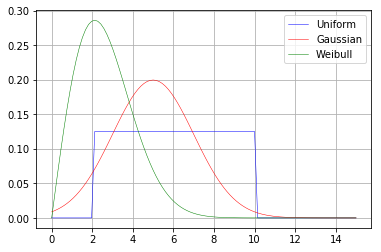

In [6]:
X  = np.linspace(0,15,100)

f1  = plt.figure(1, figsize=(6,4))

U   = ss.uniform(2,8)           # define uniform between 2 and 8
f1a = plt.plot(X, U.pdf(X),'b',lw=0.5)

Z   = ss.norm(5,2)              # define Gaussian with mean 5 and deviation 2
f1b = plt.plot(X, Z.pdf(X),'r',lw=0.5)

W   = ss.weibull_min(2,0,3)     # define Weibull with shape 2, loc 0 and scale 3
f1c = plt.plot(X, W.pdf(X),'g',lw=0.5)

plt.legend(('Uniform','Gaussian','Weibull'))
plt.grid(True)


### 2. Calculation of statistical properties

The estimation of statistical moments are straightforward and can be calculated
in some alternative ways. Below is a method for calculating the most basic properties:

In [7]:
momU = U.stats(moments='mvks')
print('Statistics for defined uniform RV')
print('---------------------------------')
print('Mean value is:             {0:6.3f}'.format(momU[0]))
print('Standard deviation is:     {0:6.3f}'.format(momU[1]))
print('Kurtosis coefficient is:   {0:6.3f}'.format(momU[2]))
print('Skewness coefficient is:   {0:6.3f}'.format(momU[3]),'\n')

momZ = Z.stats(moments='mvks')
print('Statistics for defined normal  RV')
print('---------------------------------')
print('Mean value is:             {0:6.3f}'.format(momZ[0]))
print('Standard deviation is:     {0:6.3f}'.format(momZ[1]))
print('Kurtosis coefficient is:   {0:6.3f}'.format(momZ[2]))
print('Skewness coefficient is:   {0:6.3f}'.format(momZ[3]),'\n')

momW = W.stats(moments='mvks')
print('Statistics for defined Weibull RV')
print('---------------------------------')
print('Mean value is:             {0:6.3f}'.format(momW[0]))
print('Standard deviation is:     {0:6.3f}'.format(momW[1]))
print('Kurtosis coefficient is:   {0:6.3f}'.format(momW[2]))
print('Skewness coefficient is:   {0:6.3f}'.format(momW[3]))

Statistics for defined uniform RV
---------------------------------
Mean value is:              6.000
Standard deviation is:      5.333
Kurtosis coefficient is:    0.000
Skewness coefficient is:   -1.200 

Statistics for defined normal  RV
---------------------------------
Mean value is:              5.000
Standard deviation is:      4.000
Kurtosis coefficient is:    0.000
Skewness coefficient is:    0.000 

Statistics for defined Weibull RV
---------------------------------
Mean value is:              2.659
Standard deviation is:      1.931
Kurtosis coefficient is:    0.631
Skewness coefficient is:    0.245


### 3. Custom definition of random variables

The module also allow us to define our own custom RV distributions, by inheriting 
from  class ``rv_continuous`` and programming either the probability density function 
(method ``_pdf(x)``) or the cumulative distribution function (method ``_cdf(x)``).
It is important, however, that these functions are defined to be normalized (integral
from _pdf_ must be one).

Below is an example on how to implement this new distribution:

In [8]:
class myRV(ss.rv_continuous):

    def __init__(self, LB, UB):

        self.LB = LB
        self.UB = UB 

        ss.rv_continuous.__init__(self, a=LB, b=UB)

    def _pdf(self, x):
        return 2*(x - self.a)/(self.b - self.a)**2


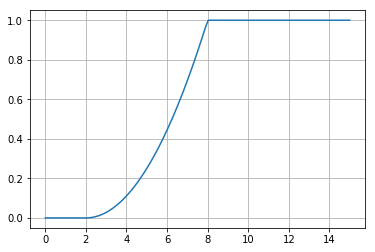

In [21]:
RV  =  myRV(2, 8)
f4  =  plt.plot(X, RV.cdf(X))

plt.grid(True)

In [22]:
momRV = RV.stats(moments='mvks')
print('Statistics for custom defined  RV')
print('---------------------------------')
print('Mean value is:             {0:6.3f}'.format(momRV[0]))
print('Standard deviation is:     {0:6.3f}'.format(momRV[1]))
print('Kurtosis coefficient is:   {0:6.3f}'.format(momRV[2]))
print('Skewness coefficient is:   {0:6.3f}'.format(momRV[3]))


Statistics for custom defined  RV
---------------------------------
Mean value is:              6.000
Standard deviation is:      2.000
Kurtosis coefficient is:   -0.566
Skewness coefficient is:   -0.600


### 4. Simulation of random variables

The following method can be applied equally to predefined RV distributions as to our 
custom distributions.


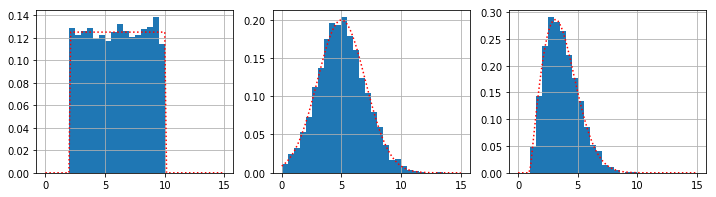

In [41]:
plt.figure(5, figsize=(12,3))

Ui = U.rvs(5000)

plt.subplot(1,3,1)
f5a = plt.hist(Ui, bins=30, range=(0,15), density=True)
f5b = plt.plot(X, U.pdf(X), 'r:')
plt.grid(True)

Zi = Z.rvs(5000)

plt.subplot(1,3,2)
f6a = plt.hist(Zi, bins=30, range=(0,15), density=True)
f6b = plt.plot(X, Z.pdf(X), 'r:')
plt.grid(True)

Wi = W.rvs(5000)

plt.subplot(1,3,3)
f7a = plt.hist(Wi, bins=30, range=(0,15), density=True)
f7b = plt.plot(X, W.pdf(X), 'r:')
plt.grid(True)

The same can be accomplished also for custom distributions:

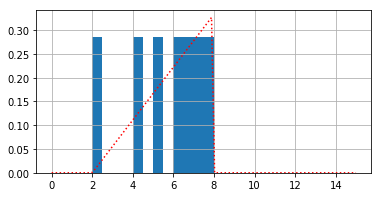

In [28]:
plt.figure(6, figsize=(6,3))

RVi = RV.ppf(X)

f6a = plt.hist(RVi, bins=30, range=(0,15), density=True)
f6b = plt.plot(X, RV.pdf(X), 'r:')
plt.grid(True)


### 5. Fitting probability distributions to data